In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats import ttest_ind, ttest_1samp
import warnings
warnings.filterwarnings('ignore')

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

# despine plots by default
plt.rc("axes.spines", top=False, right=False)

#set font sizes for figures throughout
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=20, titlesize=22)
plt.rc('legend', fontsize=16)

# color palette for sequential data
palette_sqn = 'viridis_r'

# color palette for participant IDs
palette_subj = 'magma_r'

In [2]:
import data_reader
dr = data_reader.DataReader()

index = ['subj_id', 'session_no', 'block_no', 'trial_no']

exp_1, exp_2 = 'exp_1', 'exp_2'
choices_1, dynamics_1, stim_viewing_1 = dr.get_data(path='../../data/HEM_%s/processed/' % (exp_1), stim_viewing=True)
choices_2, dynamics_2, stim_viewing_2 = dr.get_data(path='../../data/HEM_%s/processed/' % (exp_2), stim_viewing=True)

# Example trajectories

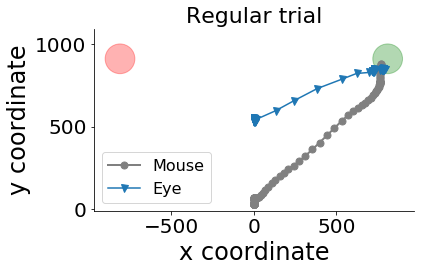

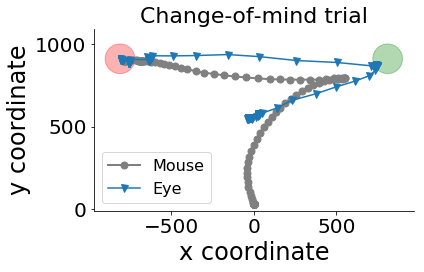

In [3]:
import trajectory_plotter
import data_analyser

tp = trajectory_plotter.TrajectoryPlotter()
da = data_analyser.DataAnalyser()

# choices, dynamics = choices_2, dynamics_2
# trajectory = da.get_random_trajectory(choices[~choices.is_com], dynamics[~choices.is_com], n=1)

# non-CoM example
trajectory = dynamics_2.loc[(518, 1, 2, 26)]
tp.plot_trajectory_xy(trajectory)
plt.title('Regular trial')
plt.savefig('figures/traj_example_non_com.png')

# CoM example
trajectory = dynamics_2.loc[(624, 3, 10, 35)]
tp.plot_trajectory_xy(trajectory)
plt.title('Change-of-mind trial')
plt.savefig('figures/traj_example_com.png')

Now let's look at the x-dynamics of the same trajectories

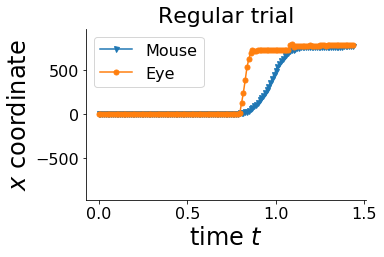

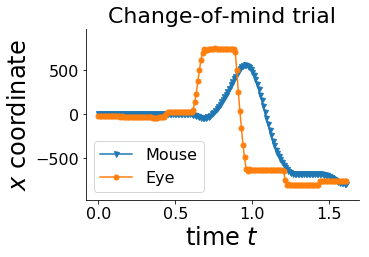

In [5]:
# non-CoM example
trajectory = dynamics_2.loc[(518, 1, 2, 26)]
tp.plot_trajectory_x(trajectory)
plt.title('Regular trial')
plt.savefig('figures/traj_example_non_com_x.png')

# CoM example
trajectory = dynamics_2.loc[(624, 3, 10, 35)]
tp.plot_trajectory_x(trajectory)
plt.title('Change-of-mind trial')
plt.savefig('figures/traj_example_com_x.png')

Text(0.5,1,'Change-of-mind trial')

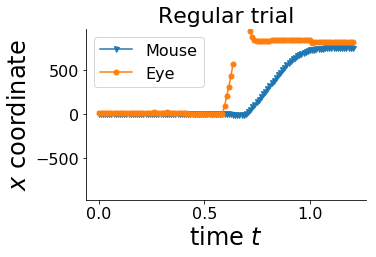

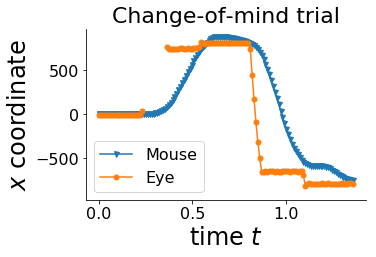

In [31]:
choices, dynamics = choices_2, dynamics_2

# non-CoM example
trajectory = da.get_random_trajectory(choices[~choices.is_com], dynamics[~choices.is_com], n=1)
tp.plot_trajectory_x(trajectory)
plt.title('Regular trial')
# plt.savefig('figures/traj_example_non_com_x.png')

# CoM example
trajectory = da.get_random_trajectory(choices[choices.is_com], dynamics[choices.is_com], n=1)
tp.plot_trajectory_x(trajectory)
plt.title('Change-of-mind trial')
# plt.savefig('figures/traj_example_com_x.png')

# Mouse trajectory analysis

Here we'll analyse whether mouse trajectory curvature depends on coherence

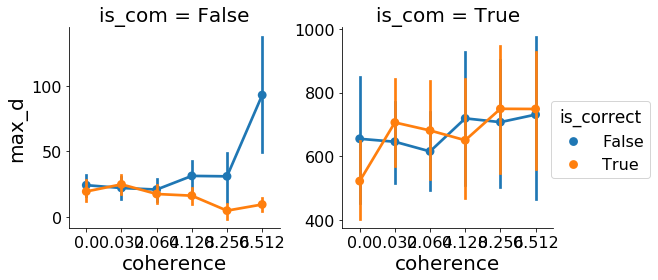

In [13]:
choices = choices_2
sns.factorplot(data=choices, x='coherence', y='max_d', col='is_com', hue='is_correct', sharey=False)

Some stats:

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
choices = choices[~choices.is_com]
    
mod = ols('max_d ~ coherence', data=choices).fit()
                
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
coherence,"11,025.271",1.000,0.792,0.374
Residual,"129,252,596.889","9,283.000",nan,nan
